In [5]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-10-19 18:52:35--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-10-19 18:52:35 (6.05 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 176kB/s 
     |████████████████████████████████| 1.6MB 29.2MB/s 
     |████████████████████████████████| 10.4MB 18.5MB/s 
     |████████████████████████████████| 7.1MB 45.2MB/s 
     |████████████████████████████████| 215kB 33.9MB/s 
     |████████████████████████████████| 2.2MB 39.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

In [ ]:
!python -m spacy download en_core_web_lg

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
import squarify

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
# create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [19]:
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# Load the pre-trained statistical model for English
import en_core_web_lg
nlp = en_core_web_lg.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [20]:
# setting up natural language processor and tokenizer
nlp = spacy.load('en_core_web_lg')

In [21]:
# setting up tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [22]:
# creates stop words
STOPWORDS = nlp.Defaults.stop_words

In [23]:
# creates a function for removing stop words
def rm_stopwords(tkns):
    '''
    a function for removing stop words from a list of tokens
    '''
    tok_list = []
    for tok in tkns:
        if str(tok) not in STOPWORDS.union(' '):
            tok_list.append(tok)
            
    return(tok_list)

In [24]:
import pandas as pd
df = pd.read_csv("/content/cannabis.csv.zip")
print(df.shape)
df.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [25]:
# copies dataframe to new df
df1 = df.copy()

In [26]:
# removes punctuation
df1['Effects'] = df1['Effects'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))

In [27]:
# creates a new column with tokenized data using lecture function
df1['tokens'] = df1['Effects'].apply(tokenizer)

# takes every token past the date token
df1['tokens'] = df1['tokens'].apply(lambda x: x[2:])

df1['tokens'] = df1['tokens'].apply(lambda x: rm_stopwords(x))

# converts tokens to list of lemmas
df1['tokens'] = df1['tokens'].apply(lambda x: 
                [token.lemma_ for token in x])

# creates a counter for the tokens
df1['counter'] = df1['tokens'].apply(Counter)

In [28]:
df1.head()

,Strain,Type,Rating,Effects,Flavor,Description,tokens,counter
0,100-Og,hybrid,4.0,CreativeEnergeticTinglyEuphoricRelaxed,"Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,[],{}
1,98-White-Widow,hybrid,4.7,RelaxedArousedCreativeHappyEnergetic,"Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,[],{}
2,1024,sativa,4.4,UpliftedHappyRelaxedEnergeticCreative,"Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,[],{}
3,13-Dawgs,hybrid,4.2,TinglyCreativeHungryRelaxedUplifted,"Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,[],{}
4,24K-Gold,hybrid,4.6,HappyRelaxedEuphoricUpliftedTalkative,"Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",[],{}


In [29]:
# Wrap it all in a function
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)  # Spacy does all the work! It does take awhile...
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and
            (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_)
    
    return lemmas

In [35]:
df1['lemmas'] = df1['Strain'].apply(get_lemmas)

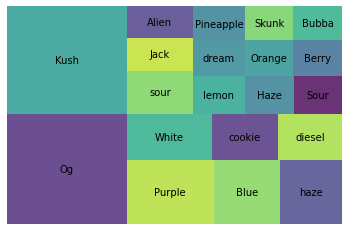

In [36]:
wc = count(df1['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

plt.style.use('ggplot')

# NLP and Word Cloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


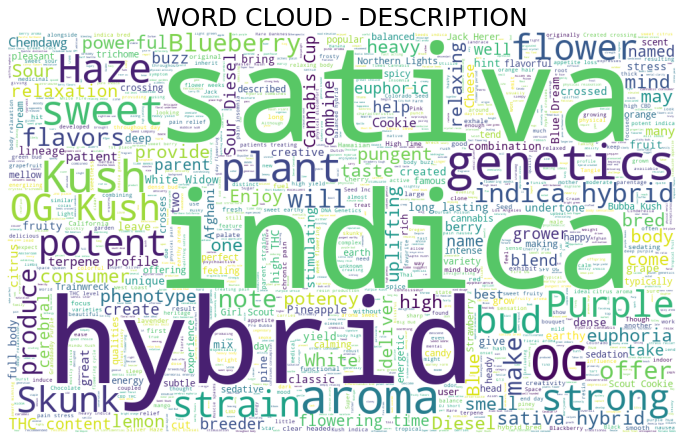

In [42]:
# description word cloud
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

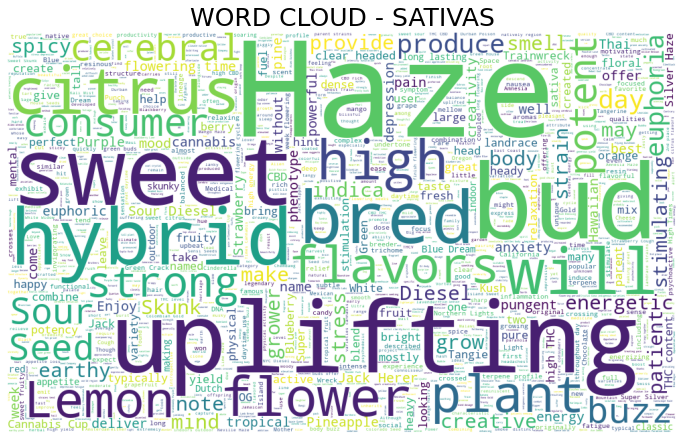

In [44]:
# sativa word cloud
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df[df.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

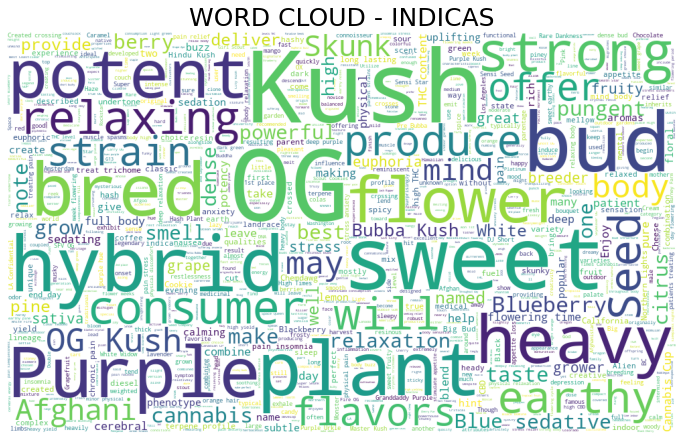

In [45]:
# indica word cloud
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df[df.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

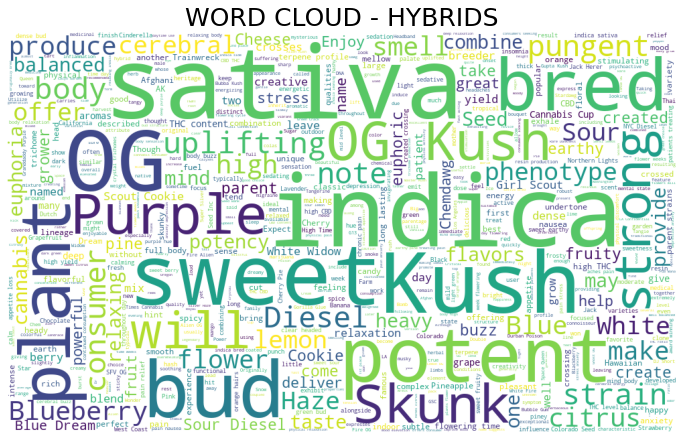

In [46]:
# hybrid word cloud
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(df[df.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()